In [1]:
import pandas as pd
import re
from os import makedirs
from os.path import join
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
def parse_temp_log(log_f,
                   max_z=50,
                   pattern="Temp1 (.+?), Z (.+?), N (\d)",
                   trial="Trial",
                   heatsink="generic",
                   heatbreak="generic",
                   block="generic",
                   nozzle="generic",
                   fan=True,
                   temp_corr=0.0
                   ):
    """
    parses log files. 
    
    Takes open filehandle.
    
    Returns Pandas DataFrame object, with columns indicating Z, Temp, and replicate number.
    For Z, subtracts indicated Z value from max_z parameter to get the Z position relative
    to the starting point.
    """
    temp = []
    z = []
    rep = []

    for line in log_f:
        match = re.search(pattern, line)
        if match:
            temp.append(float(match.group(1)) + temp_corr)
            z.append(max_z - float(match.group(2)))
            rep.append(int(match.group(3)))

    profile_df = pd.DataFrame.from_dict({"Z": z, "Temp": temp, "N": rep})
    profile_df['trial'] = trial
    profile_df['heatsink'] = heatsink
    profile_df['nozzle'] = nozzle
    profile_df['heatbreak'] = heatbreak
    profile_df['block'] = block
    profile_df['nozzle'] = nozzle
    profile_df['fan'] = fan
    
    return(profile_df)

In [3]:
def process_log(log_fp,
                plot_dir,
                **kwargs):
    
    with open(log_fp, 'r') as log_f:
        profile_df = parse_temp_log(log_f,
                                    **kwargs)
        
    plot_title = '{hotend}, {heatbreak} heatbreak, fan={fan}'.format(
                                                              hotend=profile_df.loc[0, 'heatsink'], 
                                                              heatbreak=profile_df.loc[0, 'heatbreak'],
                                                              fan=profile_df.loc[0, 'fan'])
    plot_fn = '%s_profile.png' % profile_df.loc[0, 'trial']
    
    profile_plot = (ggplot(profile_df, aes(x='Z', y='Temp', color='Temp', group='factor(N)'))
     + geom_point()
     + geom_line()
     + theme_bw()
     + ggtitle(plot_title))
    
    profile_plot.save(filename=join(plot_dir, '%s.png' % plot_title),
                      format='png',
                      width=6,
                      height=4)
    
    return(profile_df,
           profile_plot)

# Hotend testing

## Heatbreak Thermal Profiling

### TriangleLabs Dragon (standard flow)

In [4]:
tl_dr_fp = '../Logs/20210710_Dragon-SF-fan.txt'

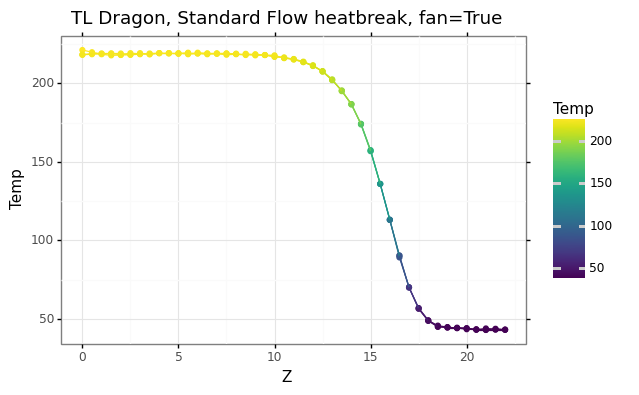

<ggplot: (283262840)>

In [5]:
tl_dr_df, tl_dr_pl = process_log(tl_dr_fp,
                                 '../Plots',
                                 max_z=50,
                                 pattern="Temp1 (.+?), Z (.+?), N (\d)",
                                 trial="20210710_Dragon-SF-fan",
                                 heatsink="TL Dragon",
                                 heatbreak="Standard Flow",
                                 block="Cu",
                                 nozzle="Cu",
                                 fan=True,
                                 temp_corr=-8.0)

tl_dr_pl

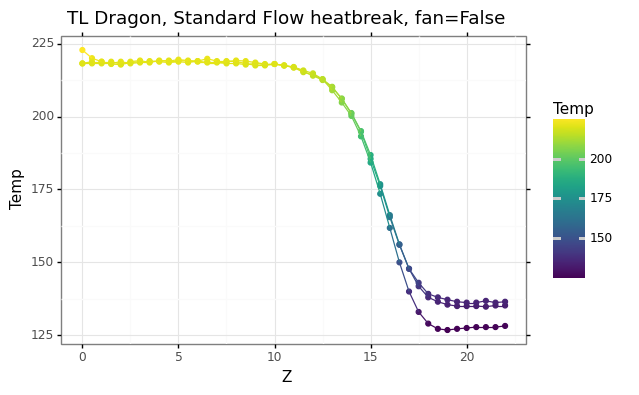

<ggplot: (-9223372036551750098)>

In [6]:
tl_dr_nf_fp = '../Logs/20210710_Dragon-SF-nofan.txt'

tl_dr_nf_df, tl_dr_nf_pl = process_log(tl_dr_nf_fp,
                                 '../Plots',
                                 max_z=50,
                                 pattern="Temp1 (.+?), Z (.+?), N (\d)",
                                 trial="20210710_Dragon-SF-nofan",
                                 heatsink="TL Dragon",
                                 heatbreak="Standard Flow",
                                 block="Cu",
                                 nozzle="Cu",
                                 fan=False,
                                 temp_corr=-8.0)

tl_dr_nf_pl

### TriangleLabs Dragon (high flow)
20210711_Dragon-HF-fan

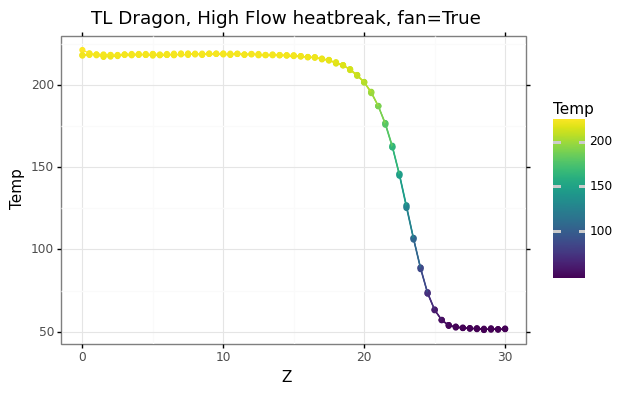

<ggplot: (-9223372036551512190)>

In [7]:
tl_dr_hf_fp = '../Logs/20210711_Dragon-HF-fan.txt'

tl_dr_hf_df, tl_dr_hf_pl = process_log(tl_dr_hf_fp,
                                 '../Plots',
                                 max_z=50,
                                 pattern="Temp1 (.+?), Z (.+?), N (\d)",
                                 trial="20210711_Dragon-HF-fan",
                                 heatsink="TL Dragon",
                                 heatbreak="High Flow",
                                 block="Cu",
                                 nozzle="Cu",
                                 fan=True,
                                 temp_corr=-8.0)

tl_dr_hf_pl

### Mellow "Aerospace material" heatbreak

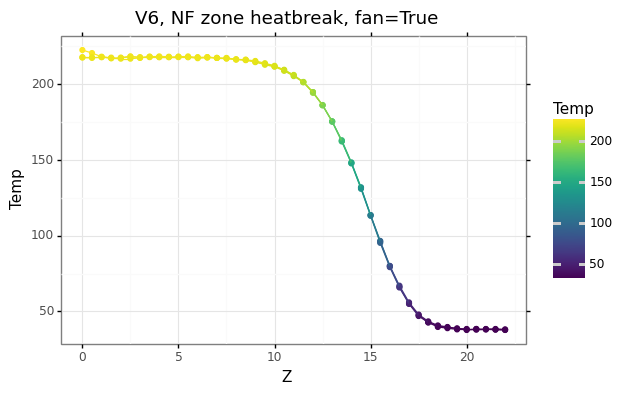

<ggplot: (-9223372036551512355)>

In [8]:
v6_nf_fp = '../Logs/20210710_V6-cu-NF_ceramic-fan-2.txt'

v6_nf_df, v6_nf_pl = process_log(v6_nf_fp,
                                 '../Plots',
                                 max_z=50,
                                 pattern="Temp1 (.+?), Z (.+?), N (\d)",
                                 trial="20210710_V6-cu-NF_ceramic-fan",
                                 heatsink="V6",
                                 heatbreak="NF zone",
                                 block="Cu",
                                 nozzle="Cu",
                                 fan=True,
                                 temp_corr=-8.0)

v6_nf_pl

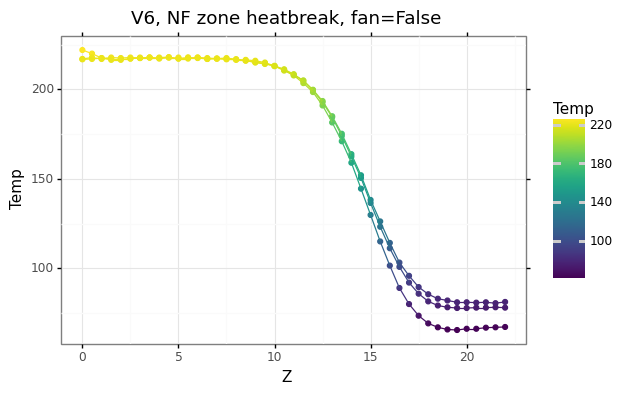

<ggplot: (303315811)>

In [9]:
v6_nf_nf_fp = '../Logs/20210710_V6-cu-NF_ceramic-nofan-2.txt'

v6_nf_nf_df, v6_nf_nf_pl = process_log(v6_nf_nf_fp,
                                 '../Plots',
                                 max_z=50,
                                 pattern="Temp1 (.+?), Z (.+?), N (\d)",
                                 trial="20210710_V6-cu-NF_ceramic-nofan",
                                 heatsink="V6",
                                 heatbreak="NF zone",
                                 block="Cu",
                                 nozzle="Cu",
                                 fan=False,
                                 temp_corr=-8.0)

v6_nf_nf_pl

### Mellow Titanium Bimetal Heatbreak

20210711_V6-cu-NF_Ti_Bimetal-fan

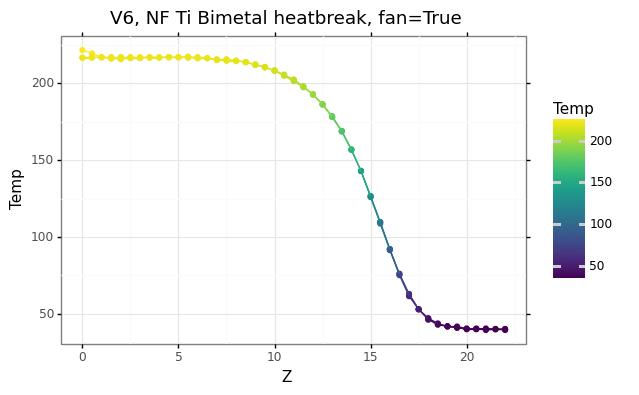

<ggplot: (-9223372036550946009)>

In [10]:
v6_nf_ti_fp = '../Logs/20210711_V6-cu-NF_Ti_Bimetal-fan.txt'

v6_nf_ti_df, v6_nf_ti_pl = process_log(v6_nf_ti_fp,
                                 '../Plots',
                                 max_z=50,
                                 pattern="Temp1 (.+?), Z (.+?), N (\d)",
                                 trial="20210711_V6-cu-NF_Ti_Bimetal-fan",
                                 heatsink="V6",
                                 heatbreak="NF Ti Bimetal",
                                 block="Cu",
                                 nozzle="Cu",
                                 fan=True,
                                 temp_corr=-8.0)

v6_nf_ti_pl

### Mellow Bimetal Heatbreak

20210711_V6-cu-NF_Bimetal-fan

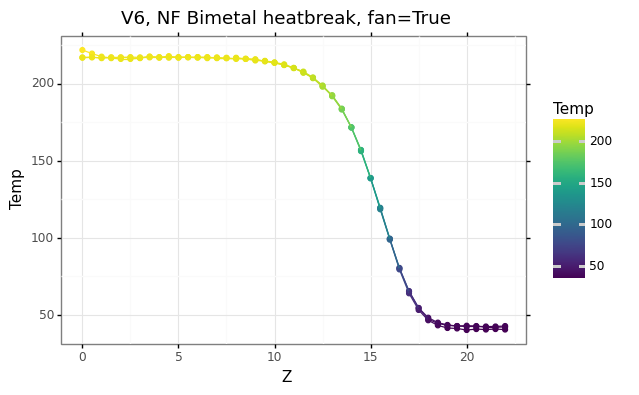

<ggplot: (-9223372036551343637)>

In [11]:
v6_nf_bi_fp = '../Logs/20210711_V6-cu-NF_Bimetal-fan.txt'

v6_nf_bi_df, v6_nf_bi_pl = process_log(v6_nf_bi_fp,
                                 '../Plots',
                                 max_z=50,
                                 pattern="Temp1 (.+?), Z (.+?), N (\d)",
                                 trial="20210711_V6-cu-NF_Bimetal-fan",
                                 heatsink="V6",
                                 heatbreak="NF Bimetal",
                                 block="Cu",
                                 nozzle="Cu",
                                 fan=True,
                                 temp_corr=-8.0)

v6_nf_bi_pl

### Generic heatbreak

20210711_V6-cu-generic-fan

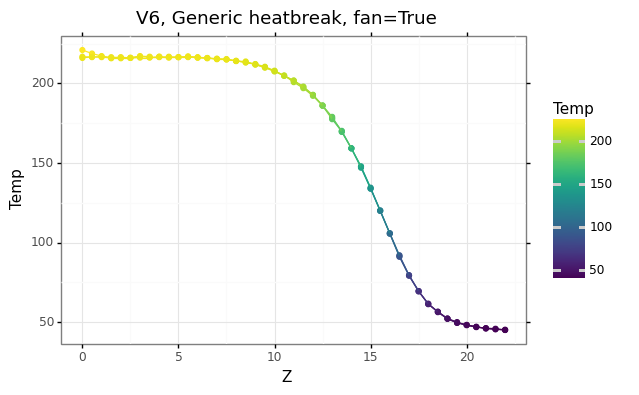

<ggplot: (303565288)>

In [12]:
v6_generic_fp = '../Logs/20210711_V6-cu-generic-fan.txt'

v6_generic_df, v6_generic_pl = process_log(v6_generic_fp,
                                 '../Plots',
                                 max_z=50,
                                 pattern="Temp1 (.+?), Z (.+?), N (\d)",
                                 trial="20210711_V6-cu-generic-fan",
                                 heatsink="V6",
                                 heatbreak="Generic",
                                 block="Cu",
                                 nozzle="Cu",
                                 fan=True,
                                 temp_corr=-8.0)

v6_generic_pl

### Mellow NF Crazy Standard Flow, fan 0.7

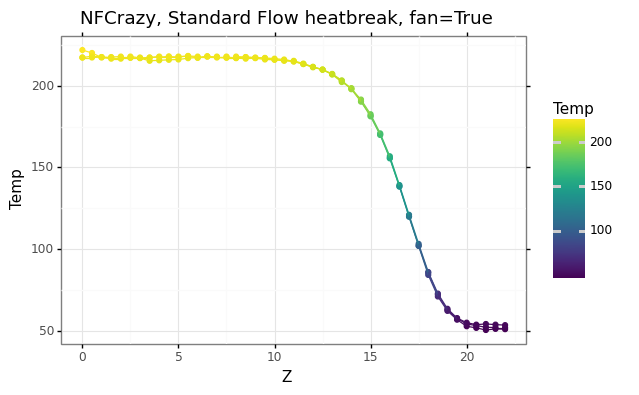

<ggplot: (-9223372036549645750)>

In [30]:
nfc_sf_f07_fp = '../Logs/20210712_NFCrazy-SF-fan0.7.txt'

nfc_sf_f07_df, nfc_sf_f07_pl = process_log(nfc_sf_f07_fp,
                                 '../Plots',
                                 max_z=50,
                                 pattern="Temp1 (.+?), Z (.+?), N (\d)",
                                 trial="20210712_NFCrazy-SF-fan0.7",
                                 heatsink="NFCrazy",
                                 heatbreak="Standard Flow",
                                 block="Cu",
                                 nozzle="Cu",
                                 fan=True,
                                 temp_corr=-8.0)

nfc_sf_f07_pl

### Mellow NF Crazy Standard Flow, fan 1.0

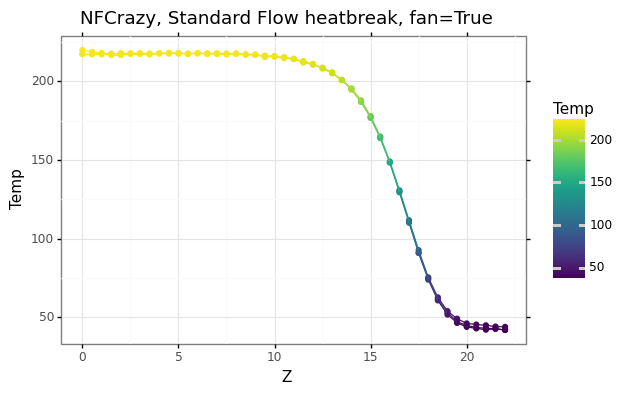

<ggplot: (-9223372036548923655)>

In [32]:
nfc_sf_f10_fp = '../Logs/20210712_NFCrazy-SF-fan1.0.txt'

nfc_sf_f10_df, nfc_sf_f10_pl = process_log(nfc_sf_f10_fp,
                                 '../Plots',
                                 max_z=50,
                                 pattern="Temp1 (.+?), Z (.+?), N (\d)",
                                 trial="20210712_NFCrazy-SF-fan1.0",
                                 heatsink="NFCrazy",
                                 heatbreak="Standard Flow",
                                 block="Cu",
                                 nozzle="Cu",
                                 fan=True,
                                 temp_corr=-8.0)

nfc_sf_f10_pl

### Slice Mosquito Standard Flow

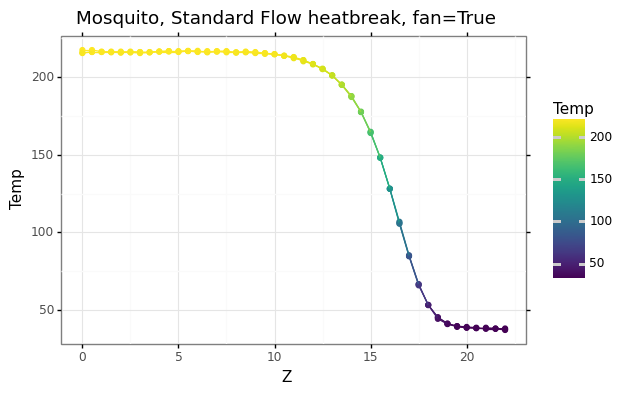

<ggplot: (305779797)>

In [40]:
mosq_sf_fp = '../Logs/20210712_Mosquito-SF.txt'

mosq_sf_df, mosq_sf_pl = process_log(mosq_sf_fp,
                                 '../Plots',
                                 max_z=50,
                                 pattern="Temp1 (.+?), Z (.+?), N (\d)",
                                 trial="20210712_Mosquito-SF",
                                 heatsink="Mosquito",
                                 heatbreak="Standard Flow",
                                 block="Cu",
                                 nozzle="Cu",
                                 fan=True,
                                 temp_corr=-8.0)

mosq_sf_pl

### Slice Mosquito Standard Flow — with thermal compound

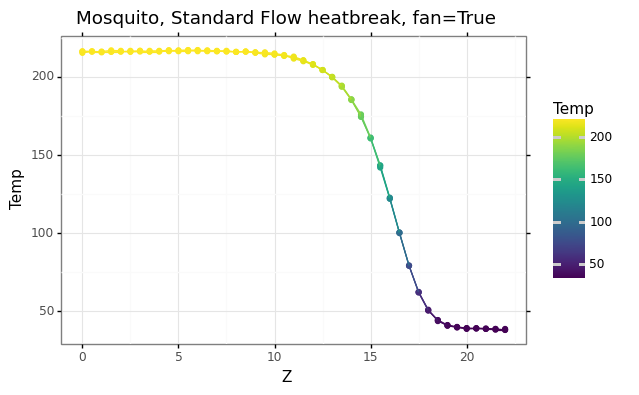

<ggplot: (305961350)>

In [46]:
mosq_sf_p_fp = '../Logs/20210712_Mosquito-SF-paste.txt'

mosq_sf_p_df, mosq_sf_p_pl = process_log(mosq_sf_p_fp,
                                 '../Plots',
                                 max_z=50,
                                 pattern="Temp1 (.+?), Z (.+?), N (\d)",
                                 trial="20210712_Mosquito-SF-paste",
                                 heatsink="Mosquito",
                                 heatbreak="Standard Flow",
                                 block="Cu",
                                 nozzle="Cu",
                                 fan=True,
                                 temp_corr=-8.0)

mosq_sf_p_pl

## Statistics

### Fit 4-parameter logistic

In [13]:
import scipy.optimize as opt
import numpy as np
from matplotlib import pyplot as plt

def four_pl(x, a, b, c, d):
    return(a / (1. + np.exp(-c * (x - d))) + b)

def heatbreak_slope(hb_df,
                    xnorm=100.0,
                    ynorm=200.0):

    x = np.array(hb_df['Z']/xnorm)
    y = np.array(hb_df['Temp']/ynorm)
    i = x.argsort()
    x_s = x[i]
    y_s = y[i]
    
    (a_, b_, c_, d_), _ = opt.curve_fit(four_pl, x_s, y_s)
    
    y_fit = four_pl(x_s, a_, b_, c_, d_)

    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(x_s*xnorm, y_s*ynorm, 'o')
    ax.plot(x_s*xnorm, y_fit*ynorm, '-')
    
    return(b_, fig)

(1.0892910831176406, <Figure size 432x288 with 1 Axes>)

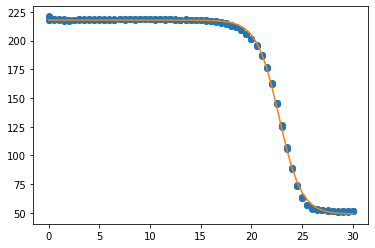

In [14]:
heatbreak_slope(tl_dr_hf_df)

(1.0902632994602568, <Figure size 432x288 with 1 Axes>)

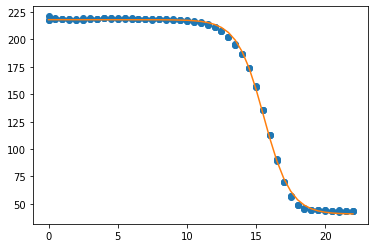

In [15]:
heatbreak_slope(tl_dr_df)

(1.0807998689085625, <Figure size 432x288 with 1 Axes>)

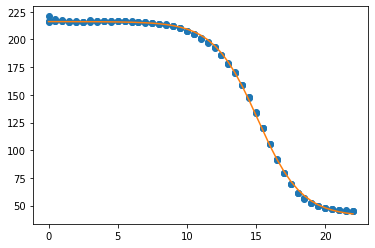

In [16]:
heatbreak_slope(v6_generic_df)

(1.0792699167344944, <Figure size 432x288 with 1 Axes>)

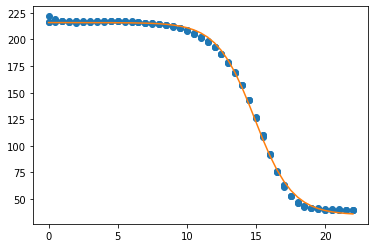

In [17]:
heatbreak_slope(v6_nf_ti_df)

(1.081273225843543, <Figure size 432x288 with 1 Axes>)

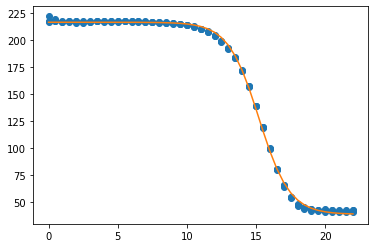

In [18]:
heatbreak_slope(v6_nf_bi_df)

(1.0856856153073884, <Figure size 432x288 with 1 Axes>)

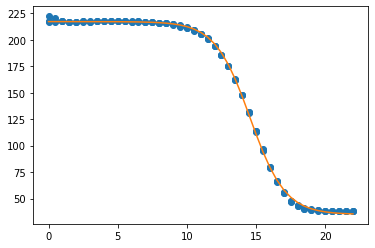

In [19]:
heatbreak_slope(v6_nf_df)

(1.0902632994602568, <Figure size 432x288 with 1 Axes>)

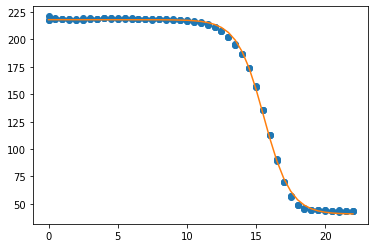

In [20]:
heatbreak_slope(tl_dr_df)

## Comparisons

In [51]:
dfs = [tl_dr_df,
      tl_dr_nf_df,
      tl_dr_hf_df,
      v6_nf_df,
      v6_nf_nf_df,
      v6_nf_ti_df,
      v6_nf_bi_df,
      v6_generic_df,
      nfc_sf_f07_df,
      nfc_sf_f10_df,
      mosq_sf_df,
      mosq_sf_p_df]

combined_df = pd.concat(dfs)
combined_df['trial_N'] = combined_df['trial'].map(str) + '-' + combined_df['N'].map(str)

### Logistic regression

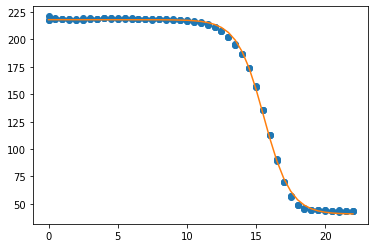

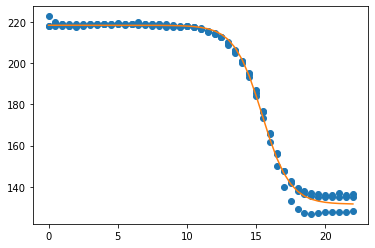

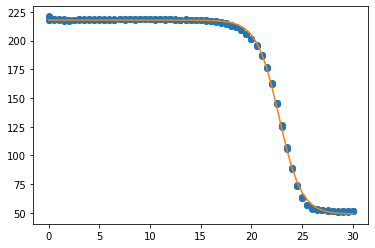

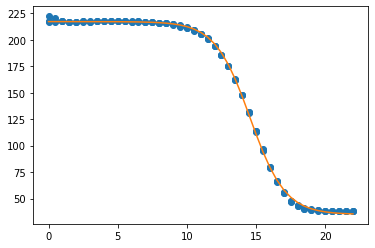

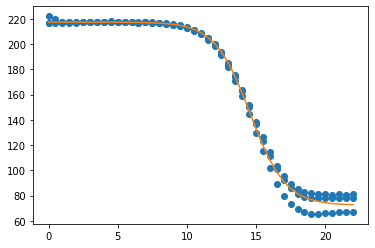

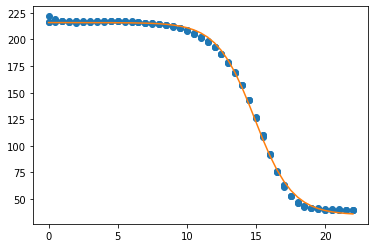

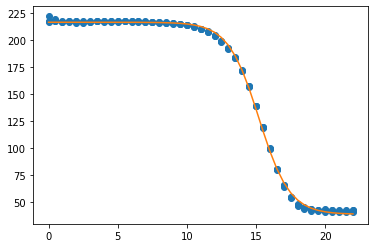

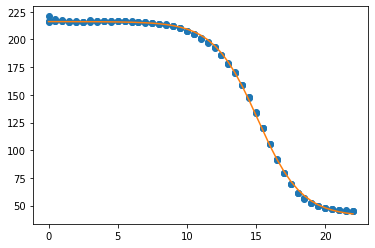

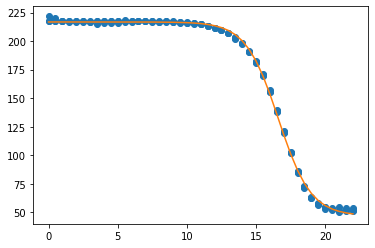

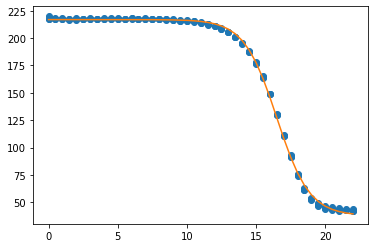

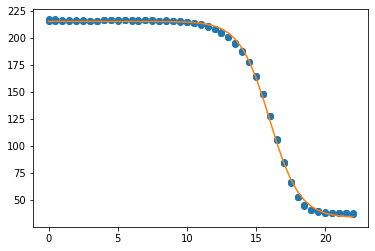

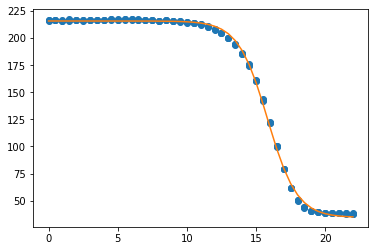

In [55]:
df_trials = []
df_bs = []

for hb_df in dfs:
    df_trials.append(hb_df.loc[0, 'trial'])
    b, plot = heatbreak_slope(hb_df)
    df_bs.append(b)

bs = pd.Series(df_bs, index=df_trials)

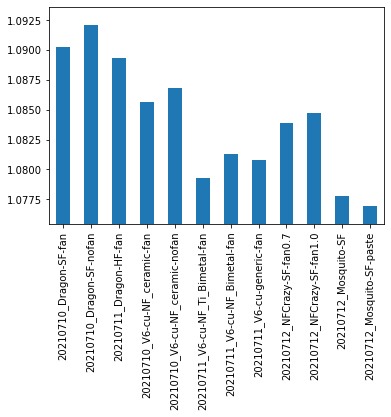

In [56]:
bs.plot.bar(ylim=(bs.min()-(bs.max() - bs.min())*.1, bs.max()+(bs.max() - bs.min())*.1))

### Fan vs no fan

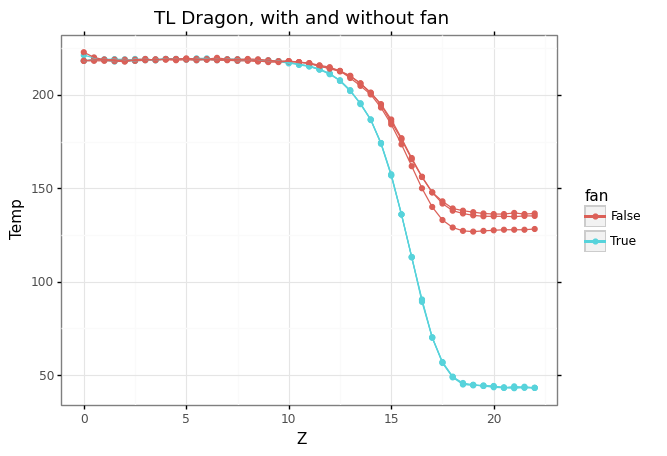

<ggplot: (-9223372036549066352)>

In [36]:
dragon_plot = (ggplot(combined_df.loc[(combined_df['heatsink'] == 'TL Dragon') &
                                      (combined_df['heatbreak'] == 'Standard Flow'),], 
                       aes(x='Z', y='Temp', color='fan', group='trial_N'))
 + geom_point()
 + geom_line()
 + theme_bw()
 + ggtitle('TL Dragon, with and without fan'))

dragon_plot

### NFCrazy: fan 70% vs fan 100%

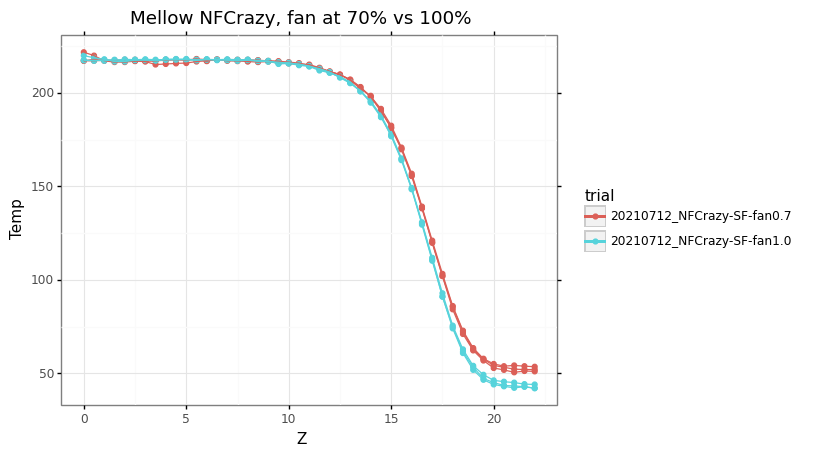

<ggplot: (305418837)>

In [52]:
nfc_fan_plot = (ggplot(combined_df.loc[(combined_df['heatsink'] == 'NFCrazy') &
                                      (combined_df['heatbreak'] == 'Standard Flow'),], 
                       aes(x='Z', y='Temp', color='trial', group='trial_N'))
 + geom_point()
 + geom_line()
 + theme_bw()
 + ggtitle('Mellow NFCrazy, fan at 70% vs 100%'))

nfc_fan_plot

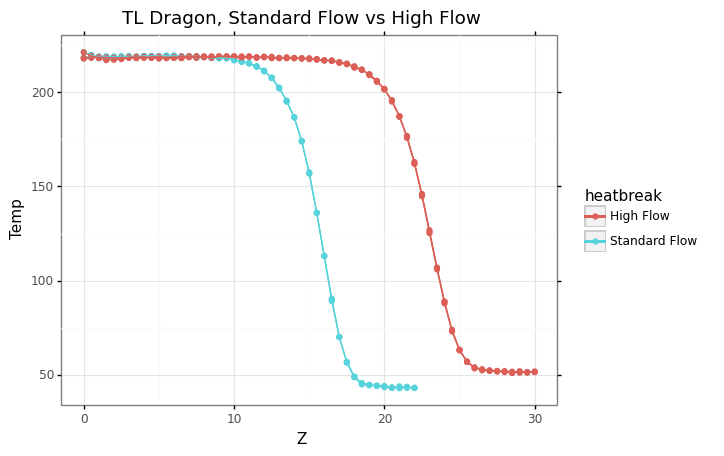

<ggplot: (-9223372036551070029)>

In [25]:
dragon_flow_plot = (ggplot(combined_df.loc[(combined_df['heatsink'] == 'TL Dragon') &
                                           combined_df['fan'],],
                       aes(x='Z', y='Temp', color='heatbreak', group='trial_N'))
 + geom_point()
 + geom_line()
 + theme_bw()
 + ggtitle('TL Dragon, Standard Flow vs High Flow'))

dragon_flow_plot

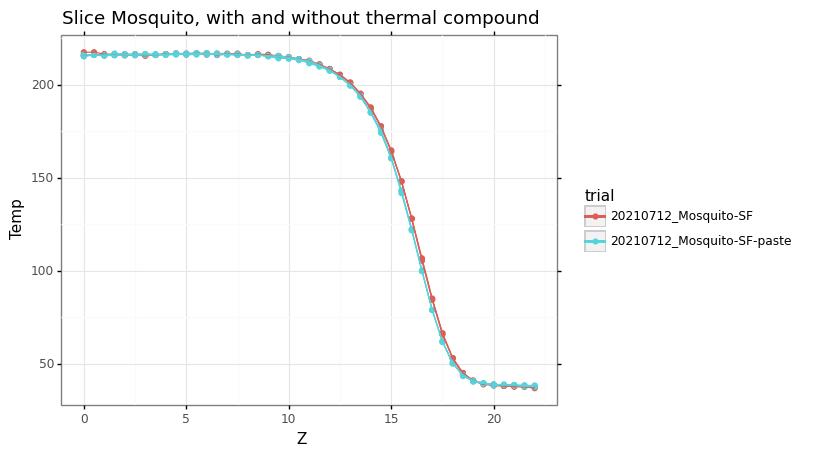

<ggplot: (306722287)>

In [54]:
mosquito_plot = (ggplot(combined_df.loc[(combined_df['trial'].isin(['20210712_Mosquito-SF',
                                                                    '20210712_Mosquito-SF-paste'])),], 
                       aes(x='Z', y='Temp', color='trial', group='trial_N'))
 + geom_point()
 + geom_line()
 + theme_bw()
                    
 + ggtitle('Slice Mosquito, with and without thermal compound'))

mosquito_plot

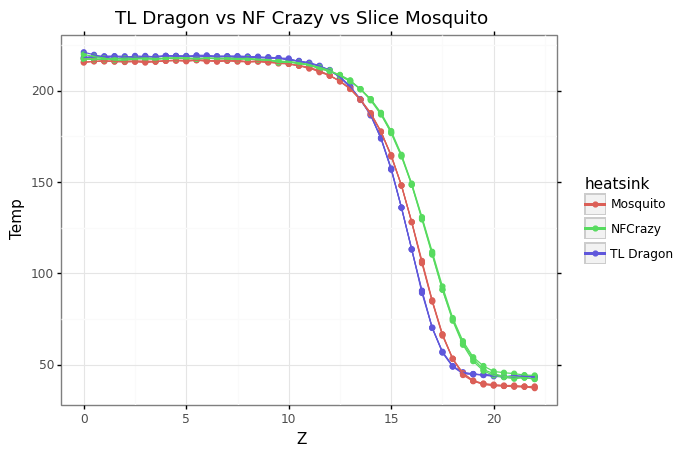

<ggplot: (308849654)>

In [61]:
dragon_nfcrazy_plot = (ggplot(combined_df.loc[(combined_df['trial'].isin(['20210712_NFCrazy-SF-fan1.0',
                                                                          '20210710_Dragon-SF-fan',
                                                                          '20210712_Mosquito-SF'])),], 
                       aes(x='Z', y='Temp', color='heatsink', group='trial_N'))
 + geom_point()
 + geom_line()
 + theme_bw()
                    
 + ggtitle('TL Dragon vs NF Crazy vs Slice Mosquito'))

dragon_nfcrazy_plot

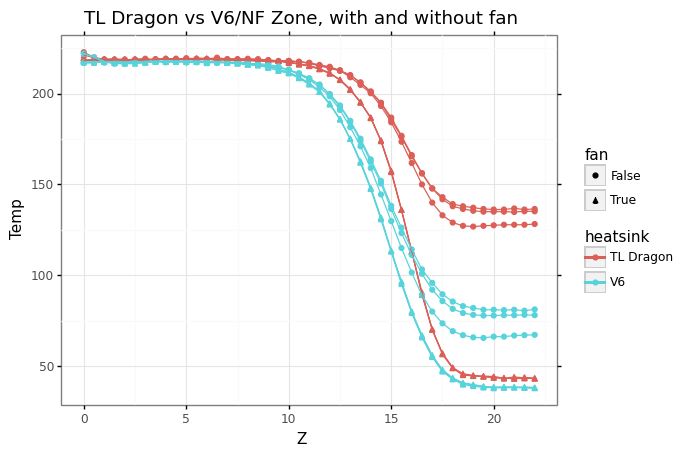

<ggplot: (303454051)>

In [26]:
dragon_zone_plot = (ggplot(combined_df.loc[(combined_df['heatsink'].isin(['TL Dragon','V6'])) &
                                           (combined_df['heatbreak'].isin(['Standard Flow','NF zone'])),], 
                       aes(x='Z', y='Temp', color='heatsink', shape='fan', group='trial_N'))
 + geom_point()
 + geom_line()
 + theme_bw()
                    
 + ggtitle('TL Dragon vs V6/NF Zone, with and without fan'))

dragon_zone_plot

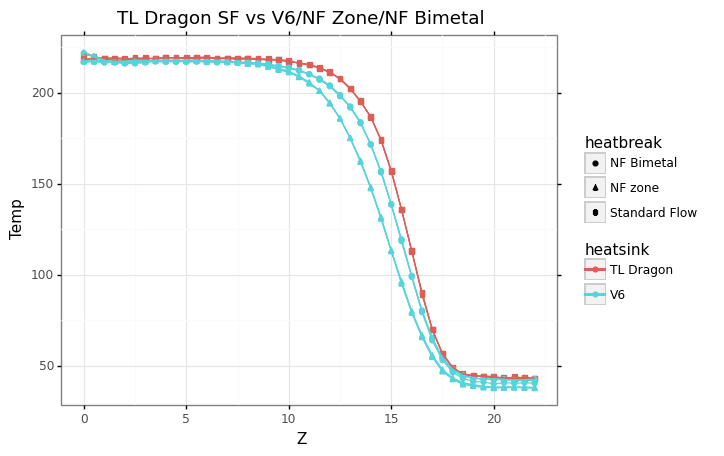

<ggplot: (-9223372036572295115)>

In [27]:
dragon_zone_fan_plot = (ggplot(combined_df.loc[(combined_df['heatsink'].isin(['TL Dragon','V6'])) &
                                               (combined_df['heatbreak'].isin(['NF zone', 'Standard Flow', 'NF Bimetal'])) &
                                               (combined_df['fan']),], 
                       aes(x='Z', y='Temp', color='heatsink', shape='heatbreak', group='trial_N'))
 + geom_point()
 + geom_line()
 + theme_bw()
                    
 + ggtitle('TL Dragon SF vs V6/NF Zone/NF Bimetal'))

dragon_zone_fan_plot

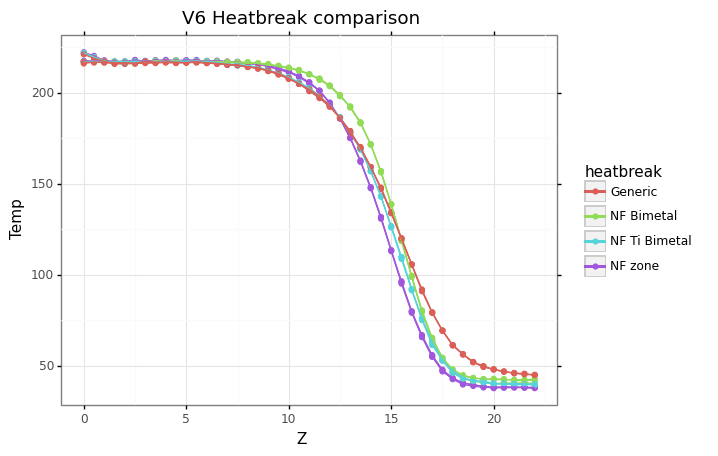

<ggplot: (-9223372036572289841)>

In [28]:
v6_fan_plot = (ggplot(combined_df.loc[(combined_df['heatsink'].isin(['V6'])) &
                                               (combined_df['fan']),], 
                       aes(x='Z', y='Temp', color='heatbreak', group='trial_N'))
 + geom_point()
 + geom_line()
 + theme_bw()
                    
 + ggtitle('V6 Heatbreak comparison'))

v6_fan_plot